## Podstawowe przykłady Pandas

Ten notebook przeprowadzi Cię przez kilka bardzo podstawowych pojęć związanych z Pandas. Zaczniemy od zaimportowania typowych bibliotek używanych w data science:


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Serie

Serie jest jak lista lub jednowymiarowa tablica, ale z indeksem. Wszystkie operacje są wyrównane względem indeksu.


In [37]:
a = pd.Series(range(1,10))
b = pd.Series(["I","like","to","use","Python","and","Pandas","very","much"],index=range(0,9))
print(a,b)

0    1
1    2
2    3
3    4
4    5
5    6
6    7
7    8
8    9
dtype: int64 0         I
1      like
2        to
3       use
4    Python
5       and
6    Pandas
7      very
8      much
dtype: object


Jednym z częstych zastosowań serii są **szeregi czasowe**. W szeregach czasowych indeks ma specjalną strukturę - zazwyczaj jest to zakres dat lub znaczników czasowych. Możemy utworzyć taki indeks za pomocą `pd.date_range`.

Załóżmy, że mamy serię pokazującą ilość produktu kupowanego każdego dnia i wiemy, że w każdą niedzielę musimy również wziąć jeden przedmiot dla siebie. Oto, jak można to zamodelować za pomocą serii:


Length of index is 366


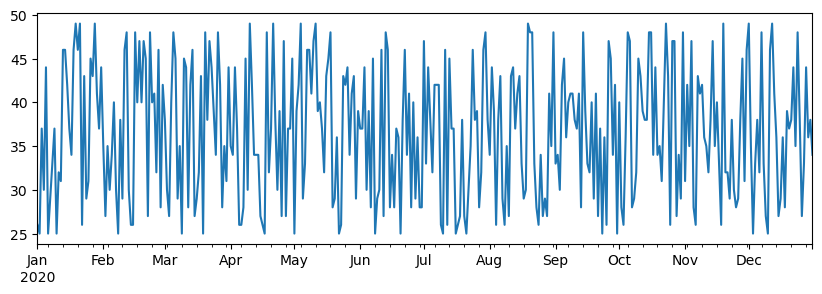

In [38]:
start_date = "Jan 1, 2020"
end_date = "Dec 31, 2020"
idx = pd.date_range(start_date,end_date)
print(f"Length of index is {len(idx)}")
items_sold = pd.Series(np.random.randint(25,50,size=len(idx)),index=idx)
items_sold.plot(figsize=(10,3))
plt.show()

In [39]:
additional_items = pd.Series(10,index=pd.date_range(start_date,end_date,freq="W"))
print(f"Additional items (10 item each week):\n{additional_items}")
total_items = items_sold+additional_items
print(f"Total items (sum of two series):\n{total_items}")

Additional items (10 item each week):
2020-01-05    10
2020-01-12    10
2020-01-19    10
2020-01-26    10
2020-02-02    10
2020-02-09    10
2020-02-16    10
2020-02-23    10
2020-03-01    10
2020-03-08    10
2020-03-15    10
2020-03-22    10
2020-03-29    10
2020-04-05    10
2020-04-12    10
2020-04-19    10
2020-04-26    10
2020-05-03    10
2020-05-10    10
2020-05-17    10
2020-05-24    10
2020-05-31    10
2020-06-07    10
2020-06-14    10
2020-06-21    10
2020-06-28    10
2020-07-05    10
2020-07-12    10
2020-07-19    10
2020-07-26    10
2020-08-02    10
2020-08-09    10
2020-08-16    10
2020-08-23    10
2020-08-30    10
2020-09-06    10
2020-09-13    10
2020-09-20    10
2020-09-27    10
2020-10-04    10
2020-10-11    10
2020-10-18    10
2020-10-25    10
2020-11-01    10
2020-11-08    10
2020-11-15    10
2020-11-22    10
2020-11-29    10
2020-12-06    10
2020-12-13    10
2020-12-20    10
2020-12-27    10
Freq: W-SUN, dtype: int64
Total items (sum of two series):
2020-01-01     NaN


Jak widać, mamy tutaj problemy, ponieważ w tygodniowej serii dni, które nie zostały wymienione, są uznawane za brakujące (`NaN`), a dodanie `NaN` do liczby daje nam `NaN`. Aby uzyskać poprawny wynik, musimy określić `fill_value` podczas dodawania serii:


2020-01-01    26.0
2020-01-02    25.0
2020-01-03    37.0
2020-01-04    30.0
2020-01-05    54.0
              ... 
2020-12-27    43.0
2020-12-28    44.0
2020-12-29    36.0
2020-12-30    38.0
2020-12-31    34.0
Length: 366, dtype: float64


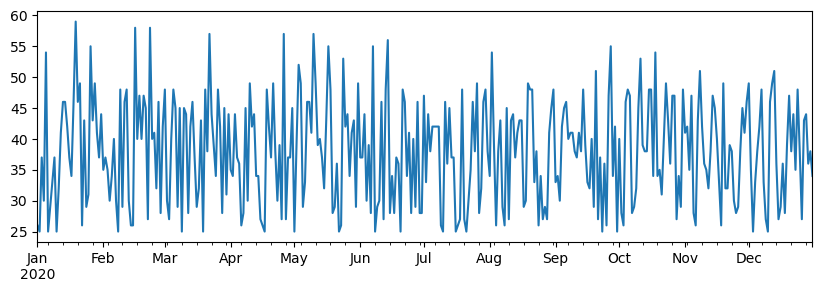

In [40]:
total_items = items_sold.add(additional_items,fill_value=0)
print(total_items)
total_items.plot(figsize=(10,3))
plt.show()

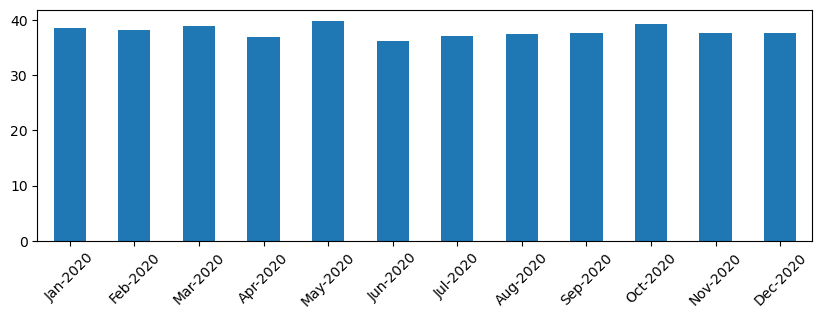

In [41]:
monthly = total_items.resample("1M").mean()
ax = monthly.plot(kind='bar',figsize=(10,3))
ax.set_xticklabels([x.strftime("%b-%Y") for x in monthly.index], rotation=45)
plt.show()

## DataFrame

DataFrame to w zasadzie zbiór serii z tym samym indeksem. Możemy połączyć kilka serii w jeden DataFrame. Mając serie `a` i `b` zdefiniowane powyżej:


In [42]:
df = pd.DataFrame([a,b])
df

0     1   2    3       4    5       6     7     8
0  1     2   3    4       5    6       7     8     9
1  I  like  to  use  Python  and  Pandas  very  much

Możemy również używać Series jako kolumn i określać nazwy kolumn za pomocą słownika:


In [43]:
df = pd.DataFrame({ 'A' : a, 'B' : b })
df

A       B
0  1       I
1  2    like
2  3      to
3  4     use
4  5  Python
5  6     and
6  7  Pandas
7  8    very
8  9    much

Ten sam wynik można osiągnąć, transponując (a następnie zmieniając nazwy kolumn, aby dopasować do poprzedniego przykładu):


In [44]:
pd.DataFrame([a,b]).T.rename(columns={ 0 : 'A', 1 : 'B' })

A       B
0  1       I
1  2    like
2  3      to
3  4     use
4  5  Python
5  6     and
6  7  Pandas
7  8    very
8  9    much

**Wybieranie kolumn** z DataFrame można wykonać w ten sposób:


In [45]:
print(f"Column A (series):\n{df['A']}")
print(f"Columns B and A (DataFrame):\n{df[['B','A']]}")

Column A (series):
0    1
1    2
2    3
3    4
4    5
5    6
6    7
7    8
8    9
Name: A, dtype: int64
Columns B and A (DataFrame):
        B  A
0       I  1
1    like  2
2      to  3
3     use  4
4  Python  5
5     and  6
6  Pandas  7
7    very  8
8    much  9


**Wybieranie wierszy** na podstawie wyrażenia filtrującego:


In [46]:
df[df['A']<5]

A     B
0  1     I
1  2  like
2  3    to
3  4   use

Sposób, w jaki to działa, polega na tym, że wyrażenie `df['A']<5` zwraca serię logiczną, która wskazuje, czy wyrażenie jest `True` czy `False` dla każdego elementu serii. Gdy seria jest używana jako indeks, zwraca podzbiór wierszy w DataFrame. Dlatego nie jest możliwe użycie dowolnego wyrażenia logicznego w Pythonie, na przykład napisanie `df[df['A']>5 and df['A']<7]` byłoby błędne. Zamiast tego należy użyć specjalnej operacji `&` na seriach logicznych:


In [47]:
df[(df['A']>5) & (df['A']<7)]

A    B
5  6  and

Tworzenie nowych kolumn obliczeniowych. Możemy łatwo tworzyć nowe kolumny obliczeniowe dla naszego DataFrame, używając intuicyjnych wyrażeń. Poniższy kod oblicza odchylenie A od jego wartości średniej.


In [48]:
df['DivA'] = df['A']-df['A'].mean()
df

A       B  DivA
0  1       I  -4.0
1  2    like  -3.0
2  3      to  -2.0
3  4     use  -1.0
4  5  Python   0.0
5  6     and   1.0
6  7  Pandas   2.0
7  8    very   3.0
8  9    much   4.0

To, co faktycznie się dzieje, to obliczanie serii, a następnie przypisywanie tej serii do lewej strony, tworząc kolejną kolumnę.


In [49]:
# WRONG: df['ADescr'] = "Low" if df['A'] < 5 else "Hi"
df['LenB'] = len(df['B']) # Wrong result

In [50]:
df['LenB'] = df['B'].apply(lambda x: len(x))
# or
df['LenB'] = df['B'].apply(len)
df

A       B  DivA  LenB
0  1       I  -4.0     1
1  2    like  -3.0     4
2  3      to  -2.0     2
3  4     use  -1.0     3
4  5  Python   0.0     6
5  6     and   1.0     3
6  7  Pandas   2.0     6
7  8    very   3.0     4
8  9    much   4.0     4

**Wybieranie wierszy na podstawie numerów** można wykonać za pomocą konstrukcji `iloc`. Na przykład, aby wybrać pierwsze 5 wierszy z DataFrame:


In [52]:
df.iloc[:5]

A       B  DivA  LenB
0  1       I  -4.0     1
1  2    like  -3.0     4
2  3      to  -2.0     2
3  4     use  -1.0     3
4  5  Python   0.0     6

**Grupowanie** jest często używane, aby uzyskać wynik podobny do *tabel przestawnych* w Excelu. Załóżmy, że chcemy obliczyć średnią wartość kolumny `A` dla każdej podanej liczby `LenB`. Wtedy możemy pogrupować nasz DataFrame według `LenB` i wywołać `mean`:


In [53]:
df.groupby(by='LenB').mean()

A      DivA
LenB                    
1     1.000000 -4.000000
2     3.000000 -2.000000
3     5.000000  0.000000
4     6.333333  1.333333
6     6.000000  1.000000

Jeśli musimy obliczyć średnią i liczbę elementów w grupie, możemy użyć bardziej zaawansowanej funkcji `aggregate`:


In [58]:
df.groupby(by='LenB') \
 .aggregate({ 'DivA' : len, 'A' : lambda x: x.mean() }) \
 .rename(columns={ 'DivA' : 'Count', 'A' : 'Mean'})

Count      Mean
LenB                 
1         1  1.000000
2         1  3.000000
3         2  5.000000
4         3  6.333333
6         2  6.000000

## Drukowanie i Wizualizacja

Data Scientist często musi eksplorować dane, dlatego ważne jest, aby móc je wizualizować. Gdy DataFrame jest duży, często chcemy upewnić się, że wszystko robimy poprawnie, drukując tylko kilka pierwszych wierszy. Można to zrobić, wywołując `df.head()`. Jeśli uruchamiasz to z poziomu Jupyter Notebook, DataFrame zostanie wyświetlony w ładnej, tabelarycznej formie.


In [59]:
df.head()

A       B  DivA  LenB
0  1       I  -4.0     1
1  2    like  -3.0     4
2  3      to  -2.0     2
3  4     use  -1.0     3
4  5  Python   0.0     6

Widzieliśmy już użycie funkcji `plot` do wizualizacji niektórych kolumn. Chociaż `plot` jest bardzo przydatna w wielu zadaniach i obsługuje różne typy wykresów za pomocą parametru `kind=`, zawsze możesz skorzystać z biblioteki `matplotlib`, aby stworzyć coś bardziej złożonego. Szczegółowo omówimy wizualizację danych w osobnych lekcjach kursu.


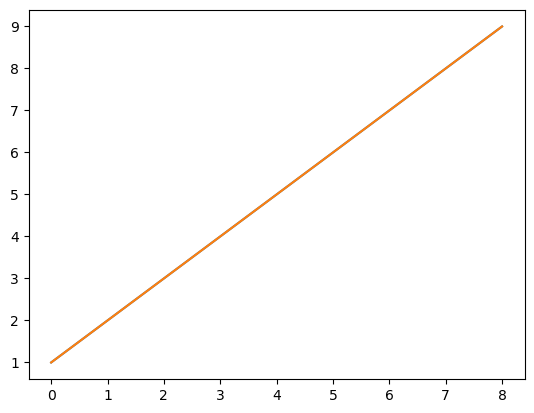

In [61]:
df['A'].plot()
plt.show()

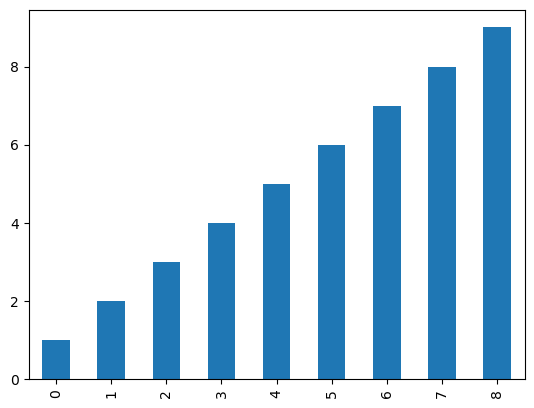

In [63]:
df['A'].plot(kind='bar')
plt.show()

Ten przegląd obejmuje najważniejsze pojęcia związane z Pandas, jednak biblioteka ta jest niezwykle bogata i możliwości jej wykorzystania są praktycznie nieograniczone! Przejdźmy teraz do zastosowania tej wiedzy w rozwiązaniu konkretnego problemu.



---

**Zastrzeżenie**:  
Ten dokument został przetłumaczony za pomocą usługi tłumaczeniowej AI [Co-op Translator](https://github.com/Azure/co-op-translator). Chociaż dokładamy wszelkich starań, aby tłumaczenie było precyzyjne, prosimy pamiętać, że automatyczne tłumaczenia mogą zawierać błędy lub nieścisłości. Oryginalny dokument w jego rodzimym języku powinien być uznawany za wiarygodne źródło. W przypadku informacji krytycznych zaleca się skorzystanie z profesjonalnego tłumaczenia wykonanego przez człowieka. Nie ponosimy odpowiedzialności za jakiekolwiek nieporozumienia lub błędne interpretacje wynikające z korzystania z tego tłumaczenia.
